# Objetivo del desafio

Conocer los determinantes (las variables) de la variacion en el promedio de deuda en tarjeta de
credito. Por lo tanto, ver que variables afectan a la deuda de credito:

- Balance es la variable dependiente
- Hay que encontrar las variables dependientes

## Que hay que hacer?

Generar modelos econometricos (probados por hipotesis estadisticas) para inspeccionar los efectos.

1. Preparar el ambiente de trabajo (1 puntos). Para ello debes:
- Importe las librerías básicas para el análisis de datos.
- Incluya los import base de statsmodels.
- Importe la base de datos Credit.csv y elimine la columna Unnamed: 0.
- Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto
del grupo minoritario en cada variable. Para el caso de Ethnicity, genere binarias
para African American, Caucasian y Asian.
Tip: Utilice value_counts() para revisar la cantidad de casos en las variables
categóricas.


In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('Credit.csv').drop(columns='Unnamed: 0')

In [3]:
print(df['Ethnicity'].value_counts())
print()
print(df['Ethnicity'].value_counts(normalize=True))

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

Caucasian           0.4975
Asian               0.2550
African American    0.2475
Name: Ethnicity, dtype: float64


In [4]:
df = pd.concat([df, pd.get_dummies(df['Ethnicity'], drop_first=True)], axis=1)

2. Generar gráficos descriptivos para las variables continuas (1 puntos):
- Genere una función llamada plot_hist que genere un histograma de la variable e
indique la media y mediana de la misma. Agregue una leyenda para indicar qué
representa cada línea.
- ¿Cuál es el comportamiento de Balance, Income, Cards y Rating?


In [5]:
def plot_hist(df, variable):
    media_variable = df[variable].mean()
    mediana_variable = df[variable].median()

    sns.histplot(data=df, x=variable)
    plt.axvline(media_variable, color='yellow', label='Media')
    plt.axvline(mediana_variable, color='red', label='Mediana')
    plt.legend()
    plt.title(f'Distribucion de {variable}')
    plt.show()



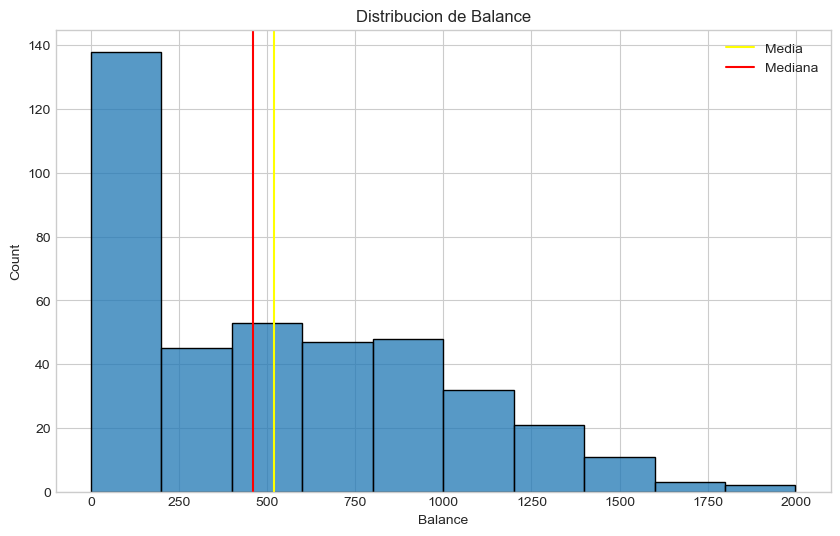

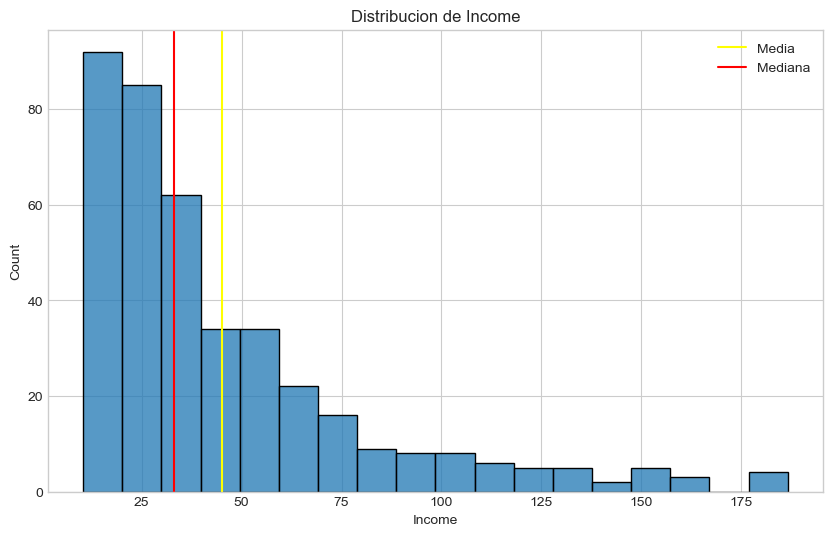

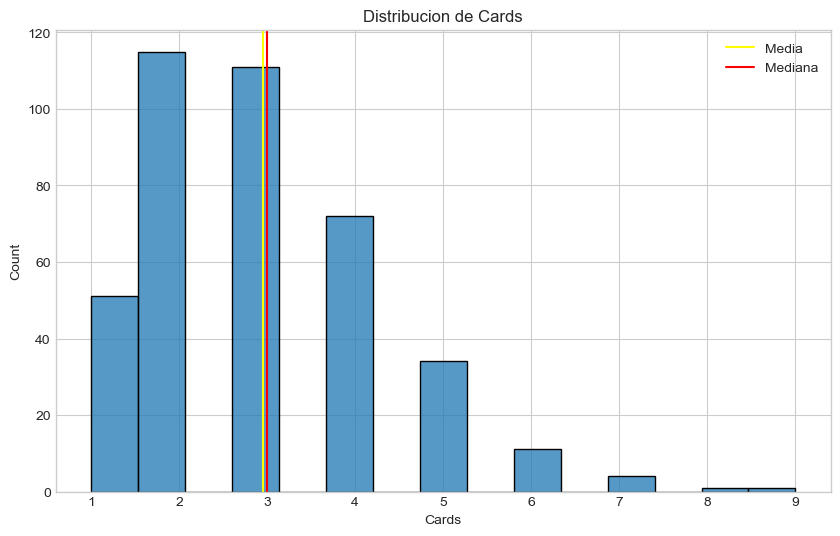

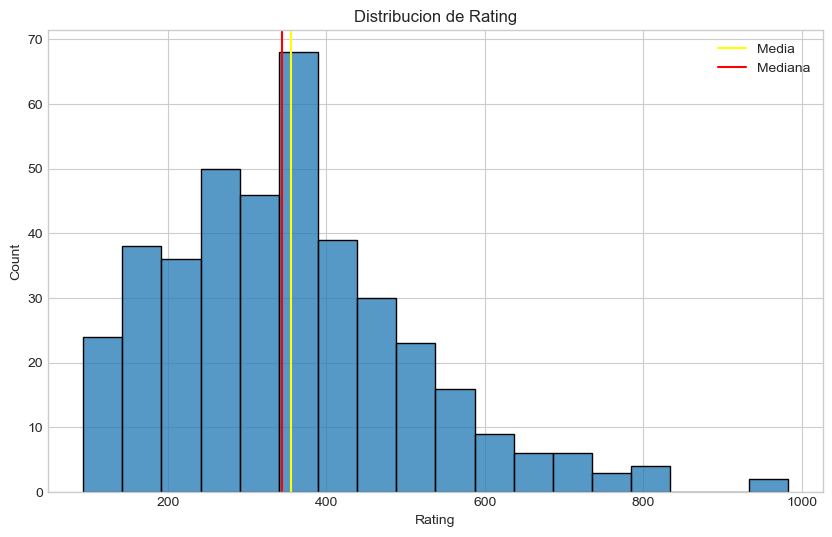

In [6]:
variables_a_analizar = ['Balance', 'Income', 'Cards', 'Rating']
for variable in variables_a_analizar:
    plot_hist(df, variable)

De forma general, se puede ver que Balance/Income/Cards poseen una distribucion
sesgada hacia sus colas mas bajas. Por otro lado, la variable Rating tiene un distribucion un poco mas acercada a la distribucion normal.

Todas las variables poseen una media y mediana similar, exceptuando Income. 

3. Regresión Lineal Simple (2 puntos). Para ello se debe:
- Generar una serie de modelos simples:
𝐵𝑎𝑙𝑎𝑛𝑐𝑒 = β
0 + γ
1
· 𝑆𝑡𝑢𝑑𝑒𝑛𝑡 + ε
𝐵𝑎𝑙𝑎𝑛𝑐𝑒 = β
0 + β · 𝐼𝑛𝑐𝑜𝑚𝑒 + ε
𝐵𝑎𝑙𝑎𝑛𝑐𝑒 = β
0 + β · 𝑅𝑎𝑡𝑖𝑛𝑔 + ε
- Utilizando statsmodels, comente brevemente los siguientes puntos:
  - ¿Qué variable presenta un mayor poder explicativo de la variabilidad de
Balance?
  - ¿Qué podemos decir sobre el comportamiento de Student?

      - ¿Qué pasa si aplicamos una prueba de hipótesis para muestras
independientes de Balance entre aquellos que son y no son
estudiantes?

In [7]:
df['Student'] = df['Student'].replace({'Yes': 1, 'No': 0})
modelo_student = smf.ols('Balance ~ Student', data=df).fit()
modelo_income = smf.ols('Balance ~ Income', data=df).fit()
modelo_rating = smf.ols('Balance ~ Rating', data=df).fit()

In [8]:
modelo_student.summary()

# La variable Student explica en un 6.7% la variacion en Balance (segun R2). Ademas, la variable
# estadistica F indica que el intercepto o la pendiente de Student son distintos de 0. El
# coeficiente del intercepto es 480.37, mientras que la pendiente de Student es 396.46. Esto estaria
# indicando que las personas que son estudiantes estarian teniendo un promedio de deuda de 396.46
# mas que las personas que no son estudiantes.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           1.49e-07
Time:                        16:09:51   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    480.3694     23.434     20.499      0.000     434.300     526.439
Student      396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
modelo_income.summary()

# La variable Income explica en un 21.5% la variacion en Balance (segun R2). Ademas, la variable
# estadistica F indica que el intercepto o la pendiente de Income son distintos de 0. El
# coeficiente del intercepto es 246.51, mientras que la pendiente de Income es 6.05. Esto estaria
# indicando que por cada unidad de Income adicional que se obtiene, el promedio de deuda en la 
# tarjeta de credito aumenta en 6.05 unidades

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           1.03e-22
Time:                        16:09:51   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
modelo_rating.summary()

# La variable Rating explica en un 74.6% la variacion en Balance (segun R2). Ademas, la variable
# estadistica F indica que el intercepto o la pendiente de Rating son distintos de 0. El
# coeficiente del intercepto es -390.85, mientras que la pendiente de Rating es 2.57. Esto estaria
# indicando que por cada unidad de Rating adicional que se obtiene, el promedio de deuda en la 
# tarjeta de credito aumenta en 2.57 unidades. Esto tiene sentido, ya que mientras mayor sea el
# Ranking de la persona (mientras peor este rankeada), es esperable ver una deuda mayor.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          1.90e-120
Time:                        16:09:51   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Por lo tanto, la variable que explica en mayor medida la variacion de Balance es Ranking.

- Student es una variable binaria, por lo que el modelo corresponde a una regresion con una
variable binaria. Esto significa que la diferencia en deuda de credito entre estudiantes (1) y los no-estudiantes (0) esta dada por la pendiente obtenida del modelo (396.46). Por lo tanto, los
estudiantes tienen, en promedio, una deuda mayor en 396.46 unidades con respecto a los no
estudiantes.

In [11]:
modelo_solo_estudiantes = smf.ols('Balance ~ Student', data=df.query('Student == 1')).fit()
modelo_no_estudiantes = smf.ols('Balance ~ Student', data=df.query('Student == 0')).fit()

In [12]:
modelo_solo_estudiantes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 15 Jan 2023   Prob (F-statistic):                nan
Time:                        16:09:51   Log-Likelihood:                -304.03
No. Observations:                  40   AIC:                             610.1
Df Residuals:                      39   BIC:                             611.7
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    438.4125     38.738     11.317      0.000     360.057     516.768
Student      438.4125     38.738     11.317      0.000     360.057     516.768
==============================================================================
Omnibus:                        5.248   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                2.535
Skew:                          -0.340   Prob(JB):                        0.281
Kurtosis:                       1.972   Cond. No.                     1.27e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.94e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
modelo_no_estudiantes.summary()

c:\Users\Javier\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 15 Jan 2023   Prob (F-statistic):                nan
Time:                        16:09:51   Log-Likelihood:                -2701.1
No. Observations:                 360   AIC:                             5404.
Df Residuals:                     359   BIC:                             5408.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    480.3694     23.159     20.742      0.000     434.825     525.914
Student             0          0        nan        nan           0           0
==============================================================================
Omnibus:                       24.874   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.378
Skew:                           0.675   Prob(JB):                     6.88e-07
Kurtosis:                       2.734   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- Al hacer dos modelos distintos para estudiantes y no estudiantes, se puede ver que
ninguno de los dos posee un poder explicativo de la variable Balance (ambos tienen R2 de 0).

4. Generar un modelo que incluya todos los regresores (2 puntos): A partir de la
siguiente fórmula, genere el modelo que incluya dichos regresores y comente
brevemente sobre el poder explicativo en la varianza de 𝑦 y las principales
características de los predictores.

In [19]:
modelo_total = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education '
                       '+ Gender + Student + Married + Ethnicity', 
                       data=df).fit()
modelo_total.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     750.3
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          1.11e-253
Time:                        16:27:10   Log-Likelihood:                -2398.7
No. Observations:                 400   AIC:                             4821.
Df Residuals:                     388   BIC:                             4869.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -479.2079     35.774    -13.395      0.000    -549.543    -408.873
Gender[T.Female]         -10.6532      9.914     -1.075      0.283     -30.145       8.839
Married[T.Yes]            -8.5339     10.363     -0.824      0.411     -28.908      11.841
Ethnicity[T.Asian]        16.8042     14.119      1.190      0.235     -10.955      44.564
Ethnicity[T.Caucasian]    10.1070     12.210      0.828      0.408     -13.899      34.113
Income                    -7.8031      0.234    -33.314      0.000      -8.264      -7.343
Limit                      0.1909      0.033      5.824      0.000       0.126       0.255
Rating                     1.1365      0.491      2.315      0.021       0.171       2.102
Cards                     17.7245      4.341      4.083      0.000       9.190      26.259
Age                       -0.6139      0.294     -2.088      0.037      -1.192      -0.036
Education                 -1.0989      1.598     -0.688      0.492      -4.241       2.043
Student                  425.7474     16.723     25.459      0.000     392.869     458.626
==============================================================================
Omnibus:                       34.899   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.766
Skew:                           0.782   Prob(JB):                     8.52e-10
Kurtosis:                       3.241   Cond. No.                     3.87e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Al utilizar todas las variables del set de datos, se puede observar que el modelo presenta un
95.5% de poder explicativo. Ademas, el valor de Prob(F-statistic) indica que al menos 1 coeficiente
(intercepto o pendiente de alguna variable) es distinto de 0. Ademas, las siguientes variables
NO tienen un efecto en la variable Y segun el p-value (grado de confianza < 0.05): Gender, Married, Ethnicity (ni Asian ni Caucasian) y Education. Las siguientes variables si tienen efecto en 
Y (grado de confianza < 0.05): Income, Limit, Rating, Cards, Age y Student.

In [21]:
# las variables que tienen un p value menor a 0.25 son: Income, Limit, Rating,
# Cards y Student

modelo_depurado = smf.ols('Balance ~ Income + Limit + Rating + Cards + Student', data=df).fit()
modelo_depurado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1640.
Date:                Sun, 15 Jan 2023   Prob (F-statistic):          3.60e-261
Time:                        16:32:37   Log-Likelihood:                -2402.8
No. Observations:                 400   AIC:                             4818.
Df Residuals:                     394   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -526.1555     19.747    -26.645      0.000    -564.977    -487.334
Income        -7.8749      0.231    -34.024      0.000      -8.330      -7.420
Limit          0.1944      0.033      5.977      0.000       0.130       0.258
Rating         1.0879      0.487      2.234      0.026       0.130       2.045
Cards         17.8517      4.335      4.118      0.000       9.329      26.374
Student      426.8501     16.574     25.754      0.000     394.266     459.435
==============================================================================
Omnibus:                       30.263   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.257
Skew:                           0.722   Prob(JB):                     2.21e-08
Kurtosis:                       3.179   Cond. No.                     2.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Al depurar el modelo se pudo observar una leve disminucion en el poder predictivo (R2 paso de 0.955
a 0.954).
- Todos los predictores mantuvieron sus p-values, y sus coeficientes se mantuvieron relativamente constantes.
- A pesar de observar una baja en el AIC (4821 a 4818), el modelo mejoro, ya que se estan utilizando un menor numero de variables para predecir Balance.

6. Utilizando lmplot de seaborn, inspeccione el comportamiento de los tres
principales determinantes. (2 puntos)

Los 3 principales determinantes (segun sus coeficientes) son Student, Cards y Rating.

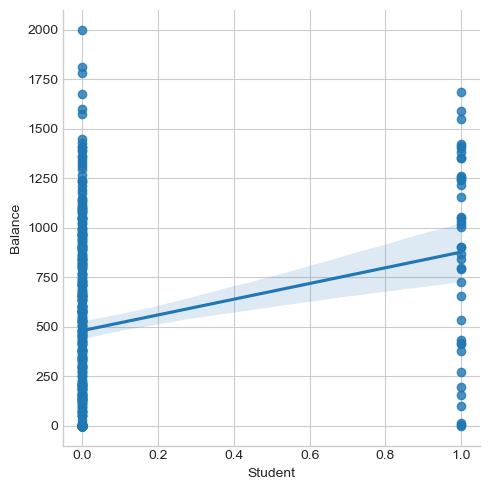

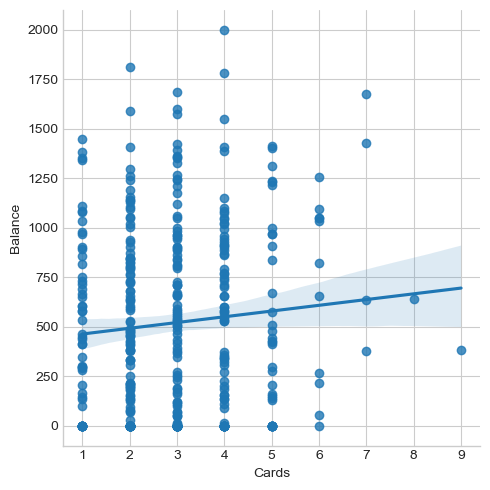

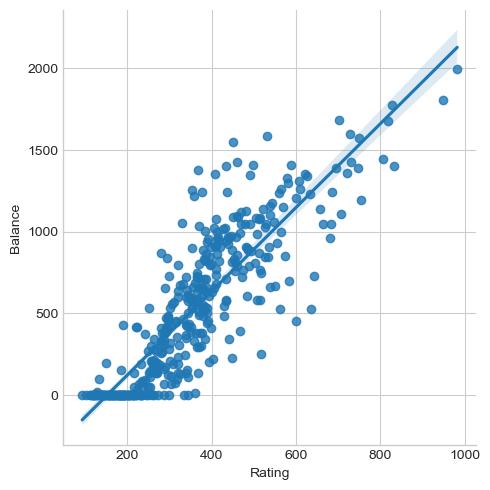

In [25]:
sns.lmplot(data=df, x='Student', y='Balance')
plt.show()
sns.lmplot(data=df, x='Cards', y='Balance')
plt.show()
sns.lmplot(data=df, x='Rating', y='Balance')
plt.show()